In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [35]:
%matplotlib inline

def imshow(img, title=None, figsize=(18,3), axis=None):
    f = plt.figure(figsize=figsize)
    if title:
        plt.title(title) 
    if axis:
        plt.axis(axis)
    plt.imshow(img, interpolation='nearest')
    display.display(f)
    plt.close(f)
    
def cv_imshow(img, title=None, figsize=(18,3), axis=None):
    if len(img.shape) == 3:
        if img.shape[2] == 4:
            imshow(cv2.cvtColor(np.array(img, np.uint8), cv2.COLOR_BGRA2RGB), title=title, figsize=figsize, axis=axis)
        else:
            imshow(cv2.cvtColor(np.array(img, np.uint8), cv2.COLOR_BGR2RGB), title=title, figsize=figsize, axis=axis)
    else:
        imshow(cv2.cvtColor(np.array(img, np.uint8), cv2.COLOR_GRAY2RGB), title=title, figsize=figsize, axis=axis)

In [225]:
im = cv2.imread('./in.png', -1)
im, alpha = im[:, :, :3], im[:, :, 3]

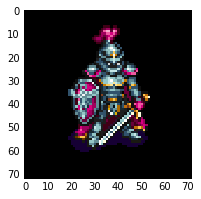

In [228]:
cv_imshow(cv2.imread('./in.png', -1))

In [229]:
def html2bgr(s):
    c = int(s, 16)
    return c & 0xFF, (c >> 8) & 0xFF, c >> 16

edit_colours = [
    html2bgr(c) for c in [
    'F49AC1',
    '3F0016',
    '55002A',
    '690039',
    '7B0045',
    '8C0051',
    '9E005D',
    'B10069',
    'C30074',
    'D6007F',
    'EC008C',
    'EE3D96',
    'EF5BA1',
    'F172AC',
    'F287B6',
    'F6ADCD',
    'F8C1D9',
    'FAD5E5',
    'FDE9F1']
]

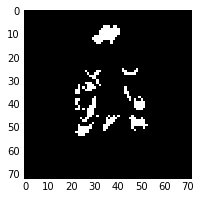

In [242]:
# The mask of where we can want to edit colours

mask = np.zeros((im.shape[0], im.shape[1]), np.bool)
for c in edit_colours:
    mask |= (im == c).all(axis=2)

cv_imshow(mask * 255)

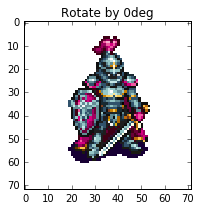

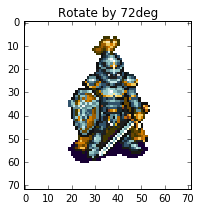

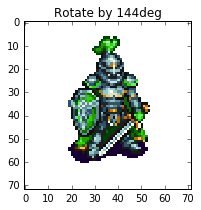

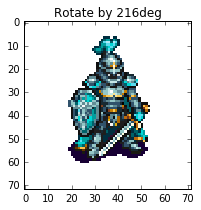

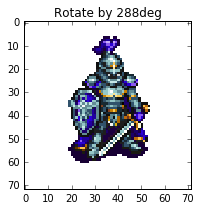

In [248]:
factions = 5

os.makedirs('./ims', exist_ok=True)
for i, rotation in enumerate(np.linspace(0, 180, factions, endpoint=False)):
    hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV).astype(np.int)
    hsv[:, :, 0][mask] += int(rotation)
    hsv[:, :, 0] %= 180
    im2 = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)
    
    preview = im2.copy()
    preview[alpha == 0] = 255
    cv_imshow(preview, 'Rotate by %ddeg' % (rotation*2))

    cv2.imwrite('./ims/%d.png' % i, np.dstack((im2, alpha)))